# Homework 3 solutions

## Diffusion-limited aggregation

In [26]:
def remove_solids(coords, grid):
    # check to see if any of the walkers are next to a solid particle,
    # in which case mark that location as solid and remove the walker from the list
    for ind, (i,j) in enumerate(coords):
        if np.sum(grid[i-1:i+2, j-1:j+2])>0:
            grid[i,j] = 1
            coords[ind] = (-1,-1)
    ind = np.where(coords[:] != (-1,-1))
    coords = coords[ind]
    coords = np.reshape(coords,(int(len(coords)/2),2))
    return coords, grid

<Figure size 640x480 with 0 Axes>

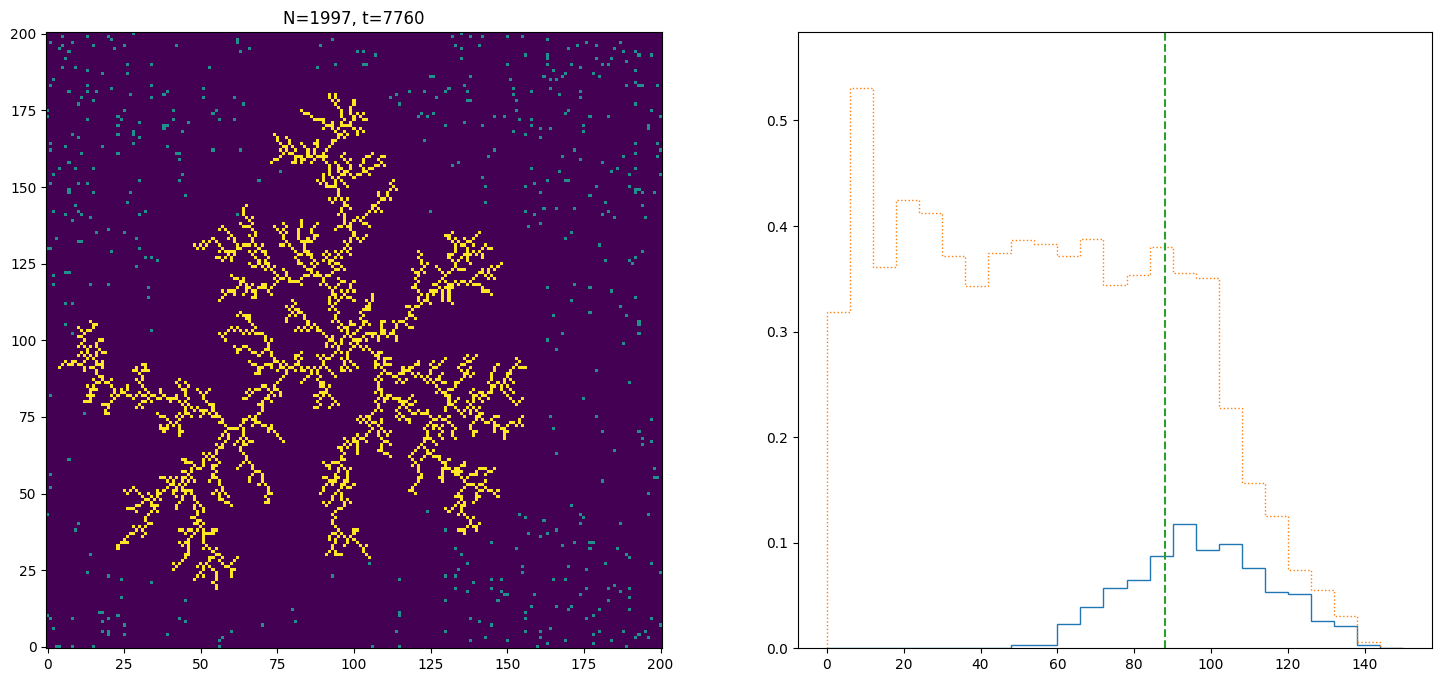

Time taken =  155.42942714691162


In [67]:
import time
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed = 12345)

ngrid = 201
ncenter = 100

grid = np.zeros((ngrid, ngrid))

# Set the initial "seed" at the center of the grid
#for i in range(ngrid):
#    for j in range(ngrid):
#        if ((i-ncenter)**2 + (j-ncenter)**2) < 3:
#            grid[i,j] = 1
# or start with only 1 particle in the center
grid[ncenter, ncenter] = 1

# An alternative is to try a linear seed:
#n1 = int(ngrid*0.49)
#n2 = int(ngrid*0.51)
#grid[n1:n2, n1:n2] = 1

# the number of "walkers" (=liquid particles)
nwalkers = 2500

# now assign random coordinates to the walkers
coords = rng.integers(low=0, high=ngrid, size=(nwalkers,2))
coords, grid = remove_solids(coords, grid)

# calculate the radial distances from the center for all particles
r_vec0 = np.zeros(len(coords[:]))
for ind, (i,j) in enumerate(coords):
    r_vec0[ind] = np.sqrt((i-ncenter)**2 + (j-ncenter)**2)

# store the number of solid particles vs time
n_arr = np.array([])
t_arr = np.array([])

t0 = time.time()

t = 0
fig_count = 0

# Keep going until we've used up some fraction of the walkers
while len(coords[:]) > 0.2 * nwalkers:

    coords = (coords + rng.integers(-1, high=2, size=np.shape(coords))) % ngrid
    coords, grid = remove_solids(coords, grid)

    if  t % 10 == 0:
        
        plt.close()
        plt.clf()
        
        fig = plt.figure(figsize=(18,8))
        ax1 = fig.add_subplot(121)
        ax1.set_title('N=%d, t=%d' % (np.sum(grid), t))
    
        gridw = np.zeros((ngrid, ngrid))
        for (i,j) in coords:
            gridw[i,j] = 1
        ax1.imshow(np.minimum(gridw + 2*grid,2), origin='lower', interpolation ='none')
        
        ax2 = fig.add_subplot(122)
        r_vec = np.zeros(len(coords[:]))
        for ind, (i,j) in enumerate(coords):
            r_vec[ind] = np.sqrt((i-ncenter)**2 + (j-ncenter)**2)
        bins0 = np.linspace(0,150,26)
        counts, bins = np.histogram(r_vec, bins = bins0)
        rads = 0.5*(bins[:-1] + bins[1:])
        plt.stairs(counts / (2*np.pi*rads), bins)
        counts, bins = np.histogram(r_vec0, bins = bins0)
        rads = 0.5*(bins[:-1] + bins[1:])
        plt.stairs(counts / (2*np.pi*rads), bins, linestyle=":")
        
        ymax = 1.1*max(counts/ (2*np.pi*rads))
        plt.plot([np.sqrt(t),np.sqrt(t)],[0.0,ymax], "--")
        plt.ylim((0.0,ymax))
        
        # Save the plot as a png file so we can make a movie
        fig_count += 1
        plt.savefig('figs/%0.4d.png' % (fig_count,))
        
        #plt.show()
    

    t = t + 1
    n_arr = np.append(n_arr, np.sum(grid))
    t_arr = np.append(t_arr, t)
    
plt.show()
print("Time taken = ", time.time()-t0)


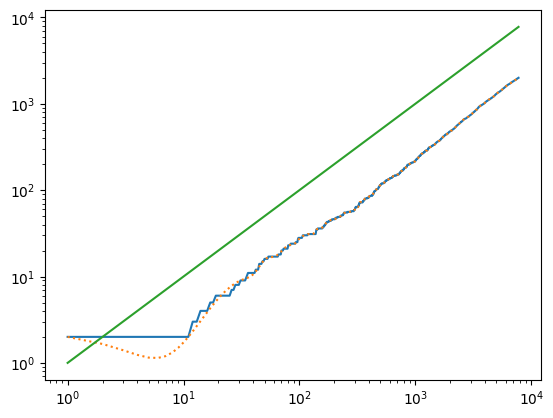

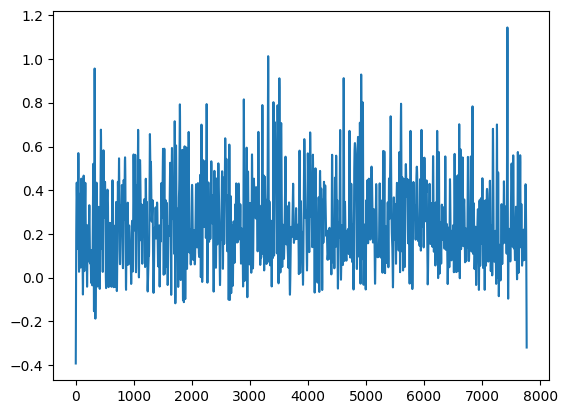

In [71]:
import scipy.interpolate

# Construct a spline of N(t)
spline = scipy.interpolate.CubicSpline(t_arr[::10],n_arr[::10])

# Plot N(t)
plt.plot(t_arr, n_arr)
plt.plot(t_arr, spline(t_arr), ":")
plt.yscale('log')
plt.xscale('log')
plt.plot(t_arr, t_arr)
plt.show()

# Plot dN/dt
plt.clf()
plt.plot(t_arr, spline(t_arr,1))
#plt.yscale('log')
#plt.xscale('log')
plt.show()

## Ising model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

seed = 112345
rng = np.random.default_rng(seed)

In [2]:
def run_ising(beta):
    
    N = 30
    Nspins = N*N
    ntrials = 10**5

    # Populate the array with random spins (+1 or -1)
    #spins = -1 + rng.integers(2, size = Nspins) * 2
    spins = np.ones(Nspins)

    M = np.zeros(ntrials)
    M[0] = np.sum(spins)/Nspins  # starting point

    # Compute the random numbers to use for accepting the jump in advance
    u = rng.uniform(size=ntrials)
    
    for i in range(ntrials-1):
        
        # Choose spin at random
        j = rng.integers(Nspins)
    
        # Compute energy change if this spin were to flip
        delta_E = 2*spins[j] * (spins[j-1] + spins[(j+1) % Nspins] + spins[j-N] + spins[(j+N) % Nspins])
    
        # Attempt flip
        if u[i] <= np.exp(-beta*delta_E):
            spins[j] = -spins[j]

        # Store magnetization
        M[i+1] = np.sum(spins)/Nspins
        
    # remove the first 20% (burn in)
    return M[int(ntrials/5):]

T =  1.0
T =  1.5000000000000004
T =  2.000000000000001
T =  2.5000000000000013
T =  3.0000000000000018
T =  3.500000000000002
T =  4.000000000000003
time =  22.873347997665405


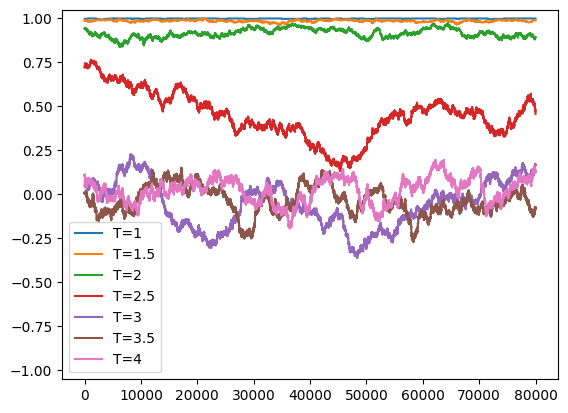

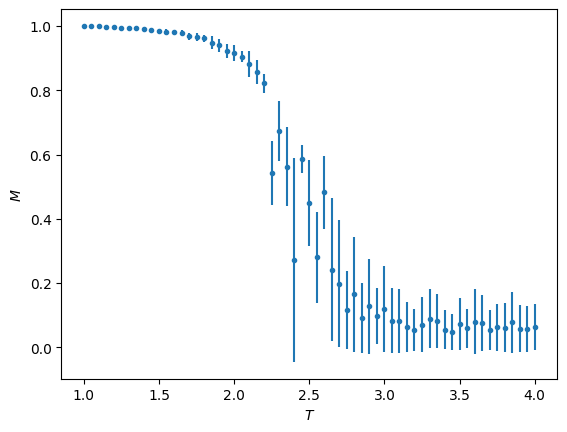

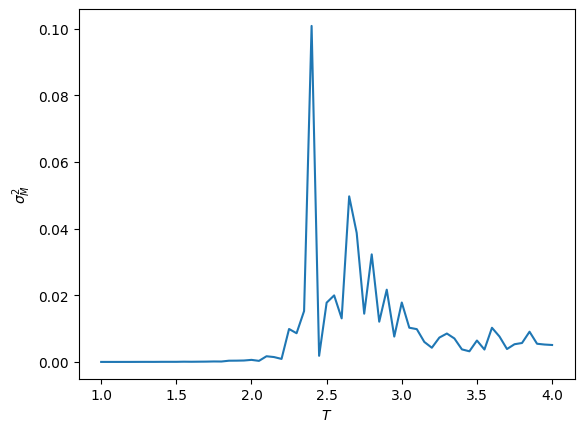

In [3]:
import time
t0 = time.time()

T_vals = np.arange(1.0,4.05,0.05)

M_vals = np.zeros_like(T_vals)
chi_vals = np.zeros_like(T_vals)

for i, T in enumerate(T_vals):
    M = run_ising(1/T)
    M_vals[i] = np.mean(np.abs(M))
    chi_vals[i] = np.var(M)

    if (abs(np.floor(T*2)-(T*2))<1e-5):
        print("T = ", T)
        t = np.arange(len(M))
        plt.plot(t, M, label = "T=%g" % (T,))

print('time = ', time.time()-t0)
        
plt.ylim((-1.05,1.05))
plt.legend()
plt.show()
        
plt.clf()
plt.errorbar(T_vals, M_vals, np.sqrt(chi_vals), fmt='.')
plt.ylabel(r'$M$')
plt.xlabel(r'$T$')
plt.show()

plt.clf()
plt.plot(T_vals, chi_vals)
plt.ylabel(r'$\sigma_M^2$')
plt.xlabel(r'$T$')
plt.show()